In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 32
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1048 		 0.1 		 0.1 |
| 1067 		 0.1 		 0.1 |
| 1031 		 0.1 		 0.1 |
| 1192 		 0.1 		 0.1 |
| 1029 		 0.1 		 0.1 |
| 1426 		 0.1 		 0.1 |
| 1797 		 0.1 		 0.1 |
| 1090 		 0.1 		 0.1 |
| 1015 		 0.1 		 0.1 |
| 1085 		 0.1 		 0.1 |
| 1105 		 0.1 		 0.1 |
| 1124 		 0.1 		 0.1 |
| 1096 		 0.1 		 0.1 |
| 1006 		 0.1 		 0.1 |
| 1212 		 0.1 		 0.1 |
| 1020 		 0.1 		 0.1 |
| 1024 		 0.1 		 0.1 |
| 1258 		 0.1 		 0.1 |
| 1059 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 129.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1121
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


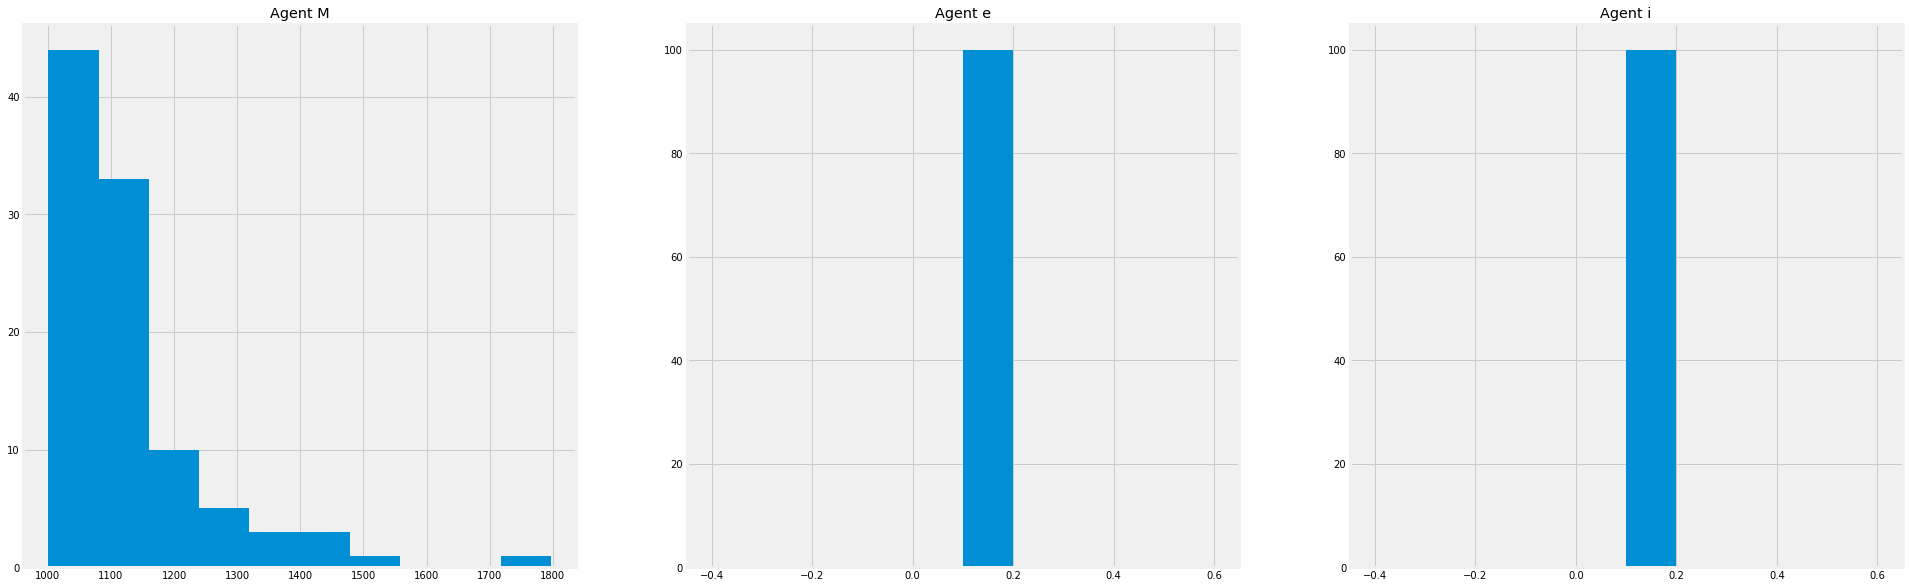

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 96.0, Temptation: 107.0, Sucker: -11.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 94.0, Temptation: 105.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 93.0, Temptation: 103.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 94.0, Temptation: 105.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 107.0, Temptation: 119.0, Sucker: -12.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 94.0, Temptation: 105.0, S

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 43 minutes.
    S.D.  Counts Seed
0    0.5     258   32
1    0.6     244   32
2    0.7     218   32
3    0.8     221   32
4    0.9     213   32
5    1.0     197   32
6    1.1     194   32
7    1.2     176   32
8    1.3     168   32
9    1.4     152   32
10   1.5     146   32
11   1.6     125   32
12   1.7      94   32
13   1.8      56   32
14   1.9      27   32
15   2.0      18   32
16   2.1      11   32
17   2.2      15   32
18   2.3      12   32
19   2.4       3   32
20   2.5       1   32
21   2.6       3   32
22   2.7       4   32
23   2.8       3   32
24   2.9       1   32
25   3.0       0   32


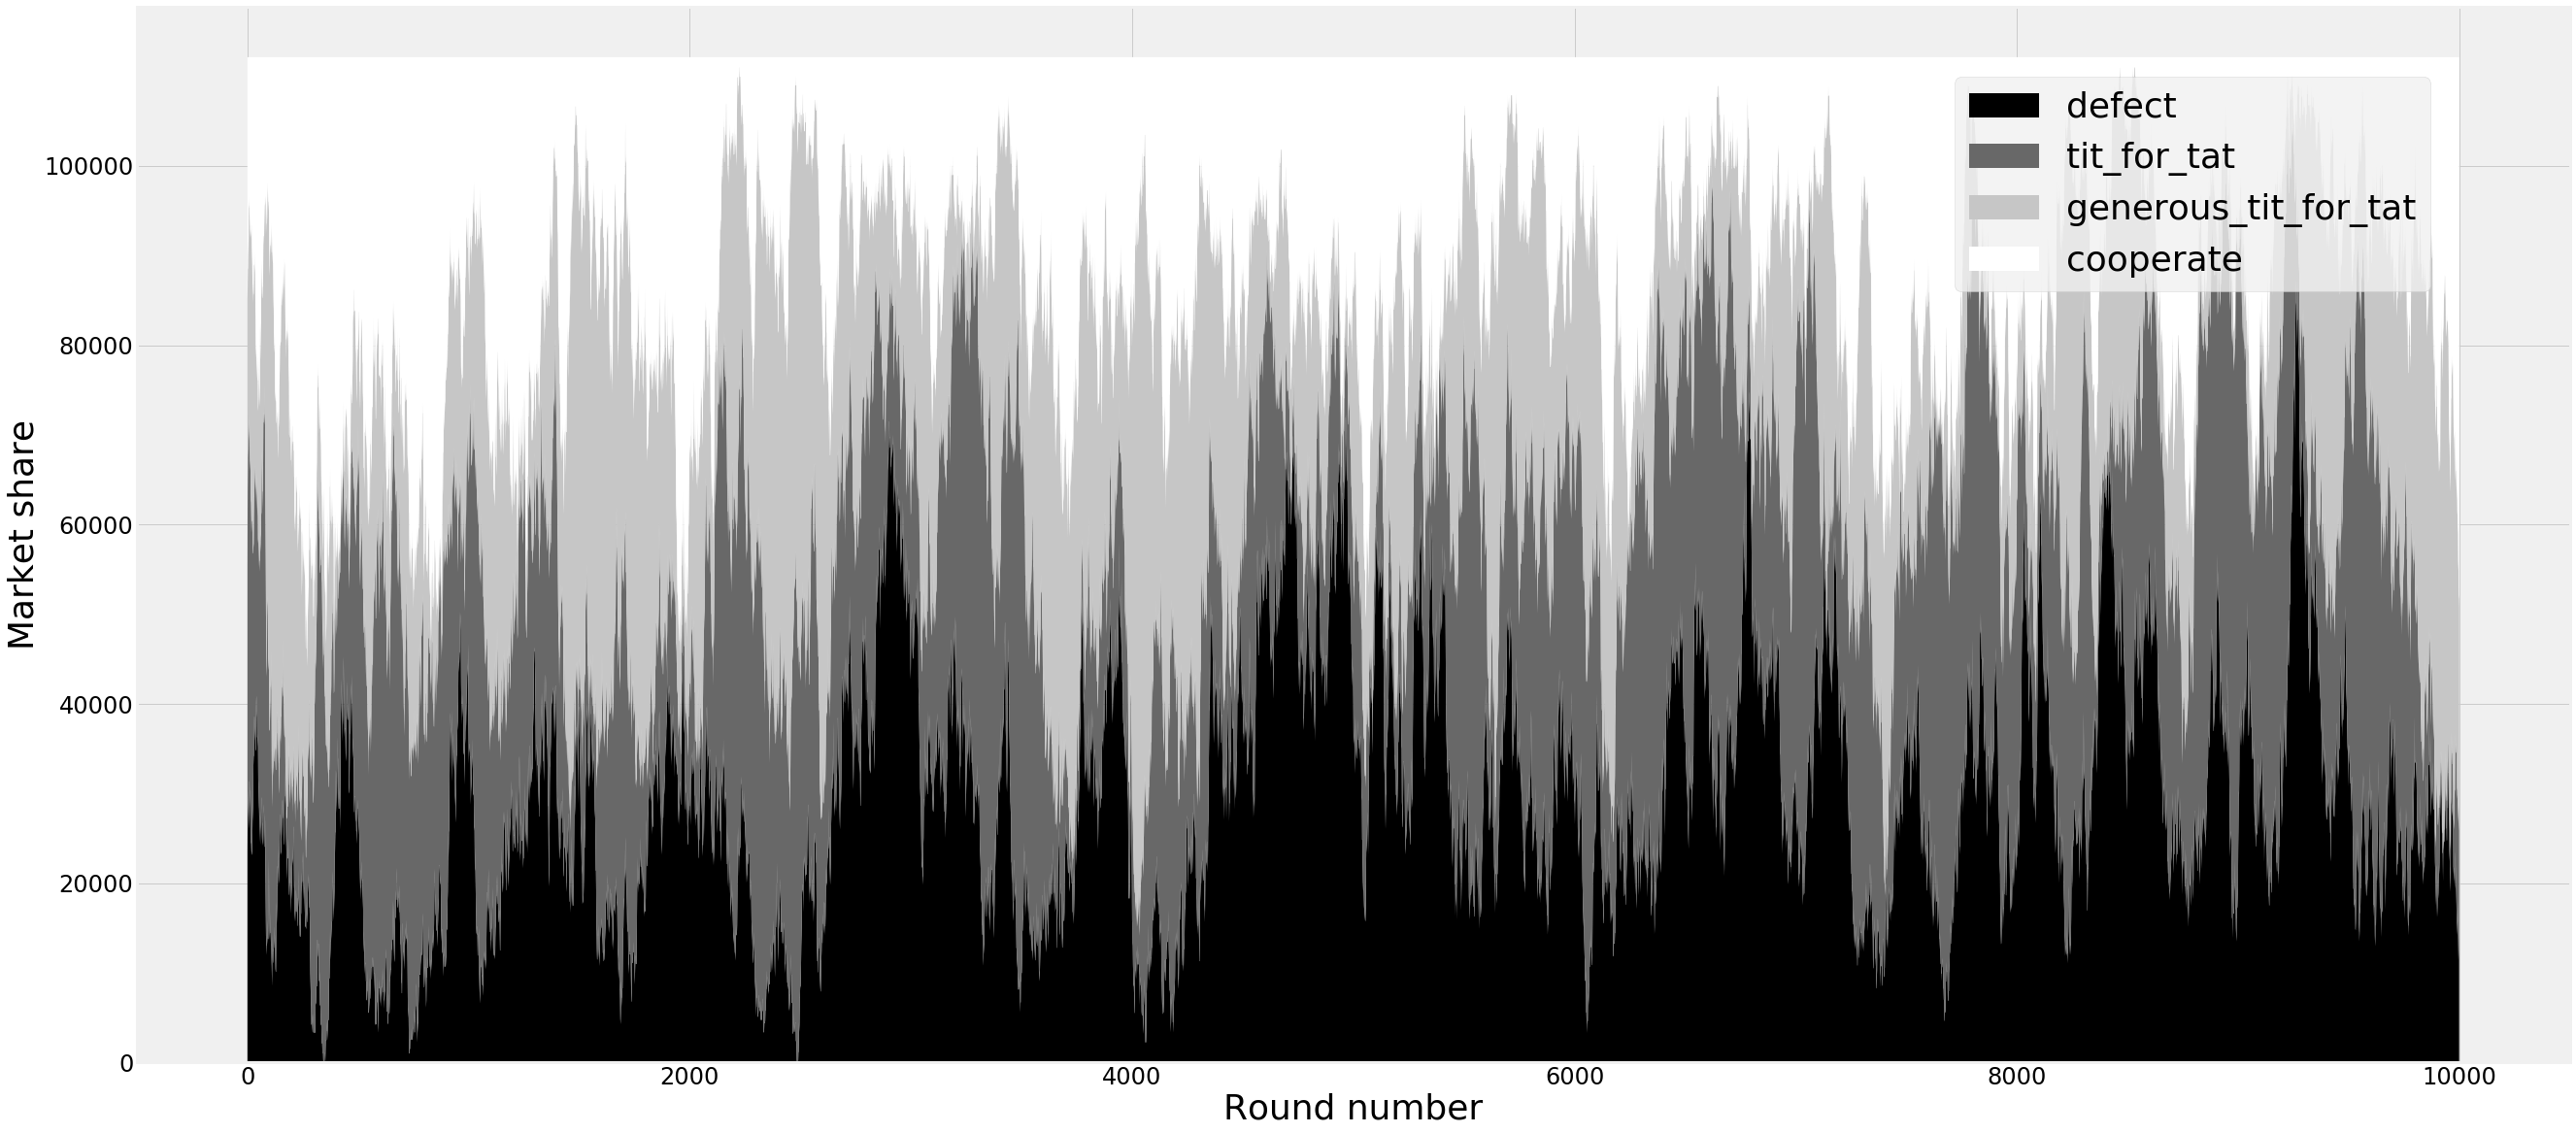

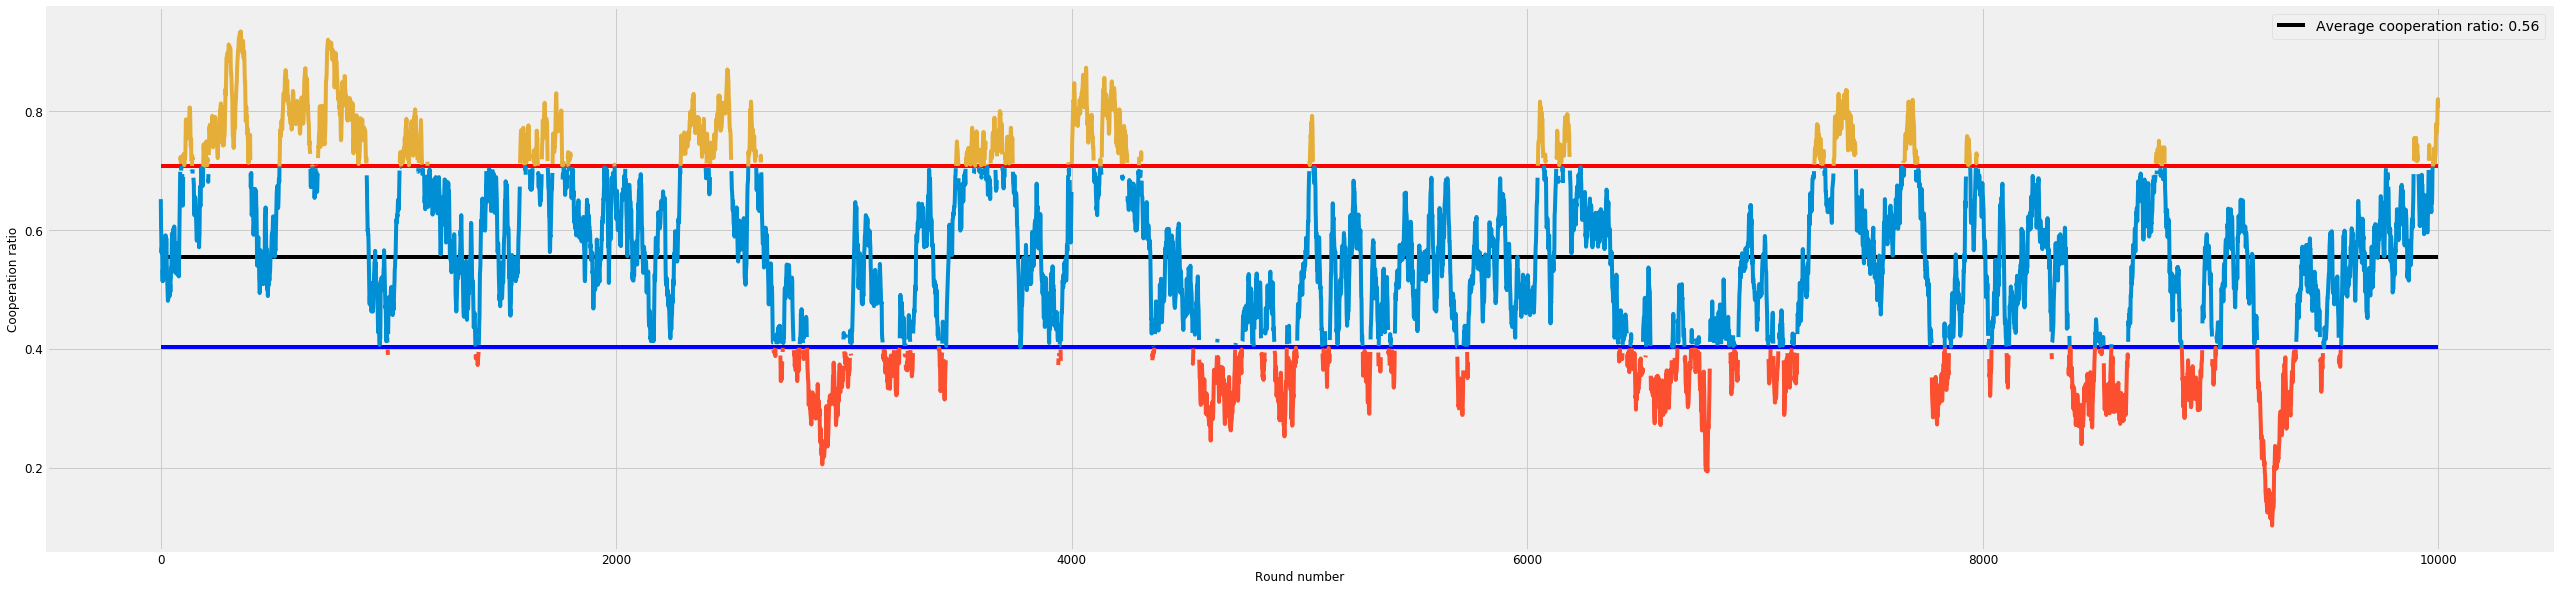

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))